In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords


In [2]:
url = '/Users/somethingcreative-7/Documents/Tessas Internship/code/Coursera.csv'
data = pd.read_csv(url)
data.head(5)

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you'll learn how to effectively...,Data Analysis select (sql) database manageme...


# Basic Data Analysis

In [3]:
data.shape #3522 courses and 7 columns with different attributes

(3423, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3423 entries, 0 to 3422
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Course Name         3423 non-null   object
 1   University          3423 non-null   object
 2   Difficulty Level    3423 non-null   object
 3   Course Rating       3423 non-null   object
 4   Course URL          3423 non-null   object
 5   Course Description  3423 non-null   object
 6   Skills              3423 non-null   object
dtypes: object(7)
memory usage: 187.3+ KB


In [5]:
#check for missing data (nil)
data.isnull().sum() 

Course Name           0
University            0
Difficulty Level      0
Course Rating         0
Course URL            0
Course Description    0
Skills                0
dtype: int64

In [6]:
data['Difficulty Level'].value_counts()

Beginner          1406
Advanced           990
Intermediate       823
Conversant         154
Not Calibrated      50
Name: Difficulty Level, dtype: int64

# Required Columns for System

#### Important columns to be used in recommendation system : 

- Course Name : Names of the courses
- Course Description : Similar courses may have similar course description
- Skills : Users may want to see courses based on same skills
- Difficulty Level : Similar courses as per difficulty level 

#### Columns not used for the recommendation system :

- Course Ratings : Numerical Column; Ratings can sometimes become a biased factor and distribution is not even
- University : Same university might offer multiple courses in different domains which the user might not want to see
- Course URL : No significance in the recommendation system

# Data Pre-Processing

An important part of the process is to pre-process the data into usable format for the recommendation system

In [7]:
df = data[['Course Name','Difficulty Level','Course Description','Skills']]
df['tokens'] = df['Course Description']


/var/folders/xg/4dfknv856n51lr83nj9crvnh0000gn/T/ipykernel_48467/3738447124.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'] = df['Course Description']


In [8]:
df.head(5)

,Course Name,Difficulty Level,Course Description,Skills,tokens
0,Write A Feature Length Screenplay For Film Or ...,Beginner,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...,Write a Full Length Feature Film Script In th...
1,Business Strategy: Business Model Canvas Analy...,Beginner,"By the end of this guided project, you will be...",Finance business plan persona (user experien...,"By the end of this guided project, you will be..."
2,Silicon Thin Film Solar Cells,Advanced,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...,This course consists of a general presentation...
3,Finance for Managers,Intermediate,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...,"When it comes to numbers, there is always more..."
4,Retrieve Data using Single-Table SQL Queries,Beginner,In this course you'll learn how to effectively...,Data Analysis select (sql) database manageme...,In this course you'll learn how to effectively...


In [9]:
#tokenize
df['tokens'] = df['tokens'].apply(lambda i: pos_tag(word_tokenize(i),tagset='universal'))

/var/folders/xg/4dfknv856n51lr83nj9crvnh0000gn/T/ipykernel_48467/2676447717.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'] = df['tokens'].apply(lambda i: pos_tag(word_tokenize(i),tagset='universal'))


In [10]:
print(df['tokens'])

0       [(Write, VERB), (a, DET), (Full, NOUN), (Lengt...
1       [(By, ADP), (the, DET), (end, NOUN), (of, ADP)...
2       [(This, DET), (course, NOUN), (consists, VERB)...
3       [(When, ADV), (it, PRON), (comes, VERB), (to, ...
4       [(In, ADP), (this, DET), (course, NOUN), (you,...
                              ...                        
3418    [(In, ADP), (the, DET), (capstone, NOUN), (,, ...
3419    [(Give, VERB), (me, PRON), (liberty, ADJ), (,,...
3420    [(Megatrends, NOUN), (', PRT), (heavily, ADV),...
3421    [(This, DET), (course, NOUN), (teaches, VERB),...
3422    [(In, ADP), (this, DET), (course, NOUN), (,, ....
Name: tokens, Length: 3423, dtype: object


In [11]:
#lemmatize
wnl = nltk.WordNetLemmatizer()
def lemmaNVAR(wpos):
    lemmas = []
    for w, pos in wpos:
        if pos == 'NOUN':
            lemmas.append(wnl.lemmatize(w.lower(), pos = 'n'))
    return lemmas
#lemmatize
#text_lem=[lemmaNVAR(pos) for pos in x_pos]
#print(text_lem)

df['tokens'] = df['tokens'].apply(lemmaNVAR)
print(df['tokens'])
print(len(df['tokens']))

0       [full, length, feature, film, script, course, ...
1       [end, project, business, model, canvas, soluti...
2       [course, presentation, cell, silicon, film, mo...
3       [number, eye, finance, 'story, balance, sheet,...
4       [course, data, database, table, sql, language,...
                              ...                        
3418    [capstone, student, series, application, proce...
3419    [death, patrick, henry, forgotten, founder, \t...
3420    [megatrends, influence, today, organisation, i...
3421    [course, dynamic, mechanic, subject, mechanica...
3422    [course, google, kubernetes, engine, productio...
Name: tokens, Length: 3423, dtype: object
3423


/var/folders/xg/4dfknv856n51lr83nj9crvnh0000gn/T/ipykernel_48467/1521549936.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'] = df['tokens'].apply(lemmaNVAR)


In [12]:
#####NEW COLUMN TOKENS


#filter unique entries, set problem
df['tokensnew'] = df['tokens']
#df['tokensnew'] = df['tokensnew'].apply(set)
#text_unique= [list(i) for i in text_unique]
#print(text_unique)
#df['tokensnew'] = df['tokensnew'].apply(str)

print(df['tokensnew'][0])


['full', 'length', 'feature', 'film', 'script', 'course', 'screenplay', 'film', 'television', 'drama', 'comedy', 'anything', 'process', 'component', 'process', 'script', 'end', 'course', 'project', 'confidence', 'idea', 'ability', 'script', 'course', 'creativity', 'learning', 'learning', 'place', 'activity', 'link', 'trailer', 'course', 'trailer', 'copy', 'paste', 'link', 'browser', 'http', 'learner', 'review', 'approach', 'professor', 'wheeler', 'towards', 'course', 'point', 'anyone', 'screenplay', 'writing', 'course', 'course', 'curriculum', 'writer', 'room', 'process', 'work', 'peer', 'review', 'share', 'feedback', 'peer', 'work', 'feedback', 'peer', 'world', 'writer', 'room', 'experience', 'writer', 'proponent', 'experiential', 'learning', 'active', 'learning', 'lecture', 'minute', 'point', 'process', 'success', 'script', 'writer', 'way', 'writer', 'learner', 'review', 'course', 'instructor', 'course', 'script', 'experience', 'word', 'processor', 'week', 'software', 'celtx', 'trelb

/var/folders/xg/4dfknv856n51lr83nj9crvnh0000gn/T/ipykernel_48467/3461617193.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokensnew'] = df['tokens']


In [13]:
#identify stopwords
mystopwords=stopwords.words("english") + ['course', 'study', 'course','learner','aim','skill', 'student','end','example','part', 'project','topic','experience','note','university','learning','introduction','use','application','way']


In [14]:
#remove stopwords
df['tokensnew'] = df['tokensnew'].apply(lambda i: [t for t in i if t not in mystopwords])
print (df['tokens'][0])
print(df['tokensnew'][0])

df.head()

['full', 'length', 'feature', 'film', 'script', 'course', 'screenplay', 'film', 'television', 'drama', 'comedy', 'anything', 'process', 'component', 'process', 'script', 'end', 'course', 'project', 'confidence', 'idea', 'ability', 'script', 'course', 'creativity', 'learning', 'learning', 'place', 'activity', 'link', 'trailer', 'course', 'trailer', 'copy', 'paste', 'link', 'browser', 'http', 'learner', 'review', 'approach', 'professor', 'wheeler', 'towards', 'course', 'point', 'anyone', 'screenplay', 'writing', 'course', 'course', 'curriculum', 'writer', 'room', 'process', 'work', 'peer', 'review', 'share', 'feedback', 'peer', 'work', 'feedback', 'peer', 'world', 'writer', 'room', 'experience', 'writer', 'proponent', 'experiential', 'learning', 'active', 'learning', 'lecture', 'minute', 'point', 'process', 'success', 'script', 'writer', 'way', 'writer', 'learner', 'review', 'course', 'instructor', 'course', 'script', 'experience', 'word', 'processor', 'week', 'software', 'celtx', 'trelb

/var/folders/xg/4dfknv856n51lr83nj9crvnh0000gn/T/ipykernel_48467/1270702061.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokensnew'] = df['tokensnew'].apply(lambda i: [t for t in i if t not in mystopwords])


,Course Name,Difficulty Level,Course Description,Skills,tokens,tokensnew
0,Write A Feature Length Screenplay For Film Or ...,Beginner,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...,"[full, length, feature, film, script, course, ...","[full, length, feature, film, script, screenpl..."
1,Business Strategy: Business Model Canvas Analy...,Beginner,"By the end of this guided project, you will be...",Finance business plan persona (user experien...,"[end, project, business, model, canvas, soluti...","[business, model, canvas, solution, analysis, ..."
2,Silicon Thin Film Solar Cells,Advanced,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...,"[course, presentation, cell, silicon, film, mo...","[presentation, cell, silicon, film, mooc, seri..."
3,Finance for Managers,Intermediate,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...,"[number, eye, finance, 'story, balance, sheet,...","[number, eye, finance, 'story, balance, sheet,..."
4,Retrieve Data using Single-Table SQL Queries,Beginner,In this course you'll learn how to effectively...,Data Analysis select (sql) database manageme...,"[course, data, database, table, sql, language,...","[data, database, table, sql, language, compute..."


In [15]:
# Frequency distribution of the tokens across whole DF
fd = nltk.FreqDist(listfinal)
print(fd.most_common(50))
fd.plot(30)

NameError: name 'listfinal' is not defined

In [57]:
#!pip install wordcloud

     |████████████████████████████████| 220 kB 7.4 MB/s eta 0:00:01
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp39-cp39-macosx_10_9_x86_64.whl size=154241 sha256=70389a9c373ad3eee9c2b458f2e3728f7cbc2fc492dc07317d93b8aba290ac27
  Stored in directory: /Users/somethingcreative-7/Library/Caches/pip/wheels/f9/7a/dd/06ef8b5dfe5483f6204133c08eeb16c287cc2c05e290ae2fc0
Successfully built wordcloud


In [86]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


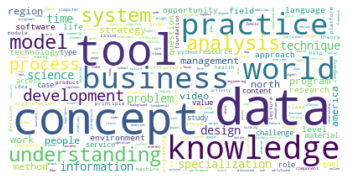

In [87]:
wc_final = WordCloud(background_color="white").generate_from_frequencies(fd)
plt.imshow(wc_final, interpolation='bilinear')
plt.axis("off")
plt.show()

Creating Tags Column

The tags column is the combination of **Course Name + Difficulty Level + tokens extracted from Course Description + Skills**

In [16]:
df['Course Name'] = df['Course Name'].str.replace(' ',',')
df['Course Name'] = df['Course Name'].str.replace(',,',',')
df['Course Name'] = df['Course Name'].str.replace(':','')
df['Skills'] = df['Skills'].str.replace('(','')
df['Skills'] = df['Skills'].str.replace(')','')

/var/folders/xg/4dfknv856n51lr83nj9crvnh0000gn/T/ipykernel_48467/227644061.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Course Name'] = df['Course Name'].str.replace(' ',',')
/var/folders/xg/4dfknv856n51lr83nj9crvnh0000gn/T/ipykernel_48467/227644061.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Course Name'] = df['Course Name'].str.replace(',,',',')
/var/folders/xg/4dfknv856n51lr83nj9crvnh0000gn/T/ipykernel_48467/227644061.py:3: SettingWithCopyWarning: 
A value is trying to be set on a 

In [17]:
df['tokensnew']=df['tokensnew'].apply(lambda i: ','.join(i))

df['tags'] = df['Course Name'] +','+ df['Difficulty Level'] +','+ df['tokensnew'] + df['Skills']
#df['tags'].iloc[1]
#df['tags'] = df['tags'].apply(set)


/var/folders/xg/4dfknv856n51lr83nj9crvnh0000gn/T/ipykernel_48467/1935785697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokensnew']=df['tokensnew'].apply(lambda i: ','.join(i))


In [18]:
df.head(5)

,Course Name,Difficulty Level,Course Description,Skills,tokens,tokensnew,tags
0,"Write,A,Feature,Length,Screenplay,For,Film,Or,...",Beginner,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...,"[full, length, feature, film, script, course, ...","full,length,feature,film,script,screenplay,fil...","Write,A,Feature,Length,Screenplay,For,Film,Or,..."
1,"Business,Strategy,Business,Model,Canvas,Analys...",Beginner,"By the end of this guided project, you will be...",Finance business plan persona user experienc...,"[end, project, business, model, canvas, soluti...","business,model,canvas,solution,analysis,resear...","Business,Strategy,Business,Model,Canvas,Analys..."
2,"Silicon,Thin,Film,Solar,Cells",Advanced,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...,"[course, presentation, cell, silicon, film, mo...","presentation,cell,silicon,film,mooc,series,eco...","Silicon,Thin,Film,Solar,Cells,Advanced,present..."
3,"Finance,for,Managers",Intermediate,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...,"[number, eye, finance, 'story, balance, sheet,...","number,eye,finance,'story,balance,sheet,income...","Finance,for,Managers,Intermediate,number,eye,f..."
4,"Retrieve,Data,using,Single-Table,SQL,Queries",Beginner,In this course you'll learn how to effectively...,Data Analysis select sql database management...,"[course, data, database, table, sql, language,...","data,database,table,sql,language,computer,syst...","Retrieve,Data,using,Single-Table,SQL,Queries,B..."


In [19]:
df['tags'].iloc[1]

'Business,Strategy,Business,Model,Canvas,Analysis,with,Miro,Beginner,business,model,canvas,solution,analysis,research,data,element,product,service,result,business,venture,ability,model,strategy,product,development,miro,platform,business,proposition,practice,result,analysis,research,result,value,business,model,sectionFinance  business plan  persona user experience  business model canvas  Planning  Business  project  Product Development  presentation  Strategy business business-strategy'

# Dataframe to be used

In [20]:
new_df = df[['Course Name','tags']]  #for this analysis, difficulty level is included in tags as a feature. KIV whether to pull out as a filter instead.

In [21]:
new_df.head(5)

,Course Name,tags
0,"Write,A,Feature,Length,Screenplay,For,Film,Or,...","Write,A,Feature,Length,Screenplay,For,Film,Or,..."
1,"Business,Strategy,Business,Model,Canvas,Analys...","Business,Strategy,Business,Model,Canvas,Analys..."
2,"Silicon,Thin,Film,Solar,Cells","Silicon,Thin,Film,Solar,Cells,Advanced,present..."
3,"Finance,for,Managers","Finance,for,Managers,Intermediate,number,eye,f..."
4,"Retrieve,Data,using,Single-Table,SQL,Queries","Retrieve,Data,using,Single-Table,SQL,Queries,B..."


In [22]:
new_df['tags'] = new_df['tags'].str.replace(',',' ')

/var/folders/xg/4dfknv856n51lr83nj9crvnh0000gn/T/ipykernel_48467/2826948580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].str.replace(',',' ')


In [23]:
new_df['Course Name'] = new_df['Course Name'].str.replace(',',' ')

/var/folders/xg/4dfknv856n51lr83nj9crvnh0000gn/T/ipykernel_48467/2506741234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Course Name'] = new_df['Course Name'].str.replace(',',' ')


In [24]:
new_df.rename(columns = {'Course Name':'course_name'}, inplace = True)

/Users/somethingcreative-7/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [25]:
new_df['tags'] = new_df['tags'].apply(lambda x:x.lower()) #lower casing the tags column

/var/folders/xg/4dfknv856n51lr83nj9crvnh0000gn/T/ipykernel_48467/172956468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x:x.lower()) #lower casing the tags column


In [26]:
new_df.head(5)

,course_name,tags
0,Write A Feature Length Screenplay For Film Or ...,write a feature length screenplay for film or ...
1,Business Strategy Business Model Canvas Analys...,business strategy business model canvas analys...
2,Silicon Thin Film Solar Cells,silicon thin film solar cells advanced present...
3,Finance for Managers,finance for managers intermediate number eye f...
4,Retrieve Data using Single-Table SQL Queries,retrieve data using single-table sql queries b...


In [27]:
new_df.shape #3522 courses with tags and 2 columns (course_name and tags)

(3423, 2)

In [28]:
new_df.to_excel("coursefeaturesoutput.xlsx") 

In [ ]:
#end